多項式回帰
==========

線形回帰は、データの傾向が直線的である場合に適していますが、多くの実世界のデータはより複雑な関係を持っています。
そこで、ここではより複雑な関係を表現できる多項式回帰を学びます。

多項式回帰は線形回帰を拡張したモデルで、多項式を用いてより複雑な非線形関係をモデル化します。
一般的な形式は以下のようになります。

```{math}
f(X) = a_0 + a_1 \cdot X + a_2 \cdot X^2 + ... + a_n \cdot X^n
```

ここで、$n$は多項式の次数を表し、$a_0, a_1, ..., a_n$はモデルのパラメータです。

## データの準備

予測に使うデータの準備からはじめましょう。
ここでは、$sin$関数にノイズを加えたデータを生成します。

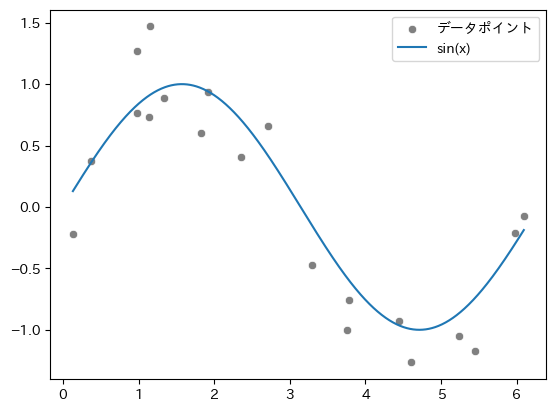

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

np.random.seed(42)
X = np.random.uniform(0, 2 * np.pi, 20).reshape(-1, 1)
y = np.sin(X) + 0.3 * np.random.normal(size=X.shape)
X_disp = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_disp = np.sin(X_disp)

sns.scatterplot(x=X.flatten(), y=y.flatten(), color='gray', label='データポイント')
sns.lineplot(x=X_disp.flatten(), y=y_disp.flatten(), label='sin(x)')
plt.legend()
plt.show()

このプログラムでは、$0$から$2\pi$の範囲で20個のデータポイントを生成し、
それに$sin$関数を適用して、ガウスノイズを加えています。

## 多項式モデル

生成したデータに対して、1次式の線形回帰モデルを適応するとどうなるかを見てみましょう。

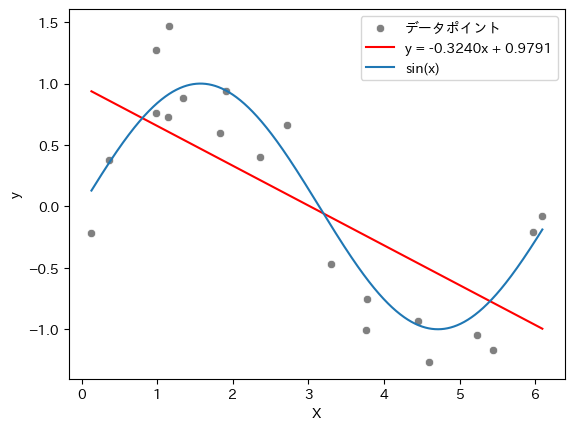

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

y_pred_linear = model.predict(X)

sns.scatterplot(x=X.flatten(), y=y.flatten(), color='gray', label='データポイント')
sns.lineplot(x=X_disp.flatten(), y=model.predict(X_disp).flatten(), color='red', label=f'y = {model.coef_[0][0]:.4f}x + {model.intercept_[0]:.4f}')
sns.lineplot(x=X_disp.flatten(), y=y_disp.flatten(), label='sin(x)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

予測線がデータとはかけ離れていますね。

では、多項式モデルで予測してみます。

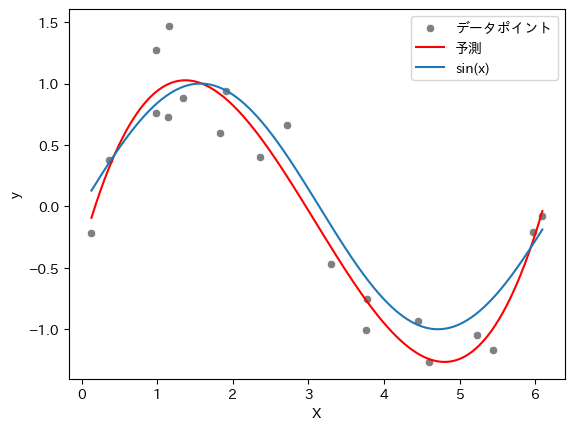

線形のMSE: 0.35
多項のMSE: 0.05
線形のR2: 0.52
多項のR2: 0.93


In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
    
model = LinearRegression()
model.fit(X_poly, y)

y_pred_poly3 = model.predict(X_poly)
    
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='gray', label='データポイント')
sns.lineplot(x=X_disp.flatten(), y=model.predict(poly_features.fit_transform(X_disp)).flatten(), color='red', label=f'予測')
sns.lineplot(x=X_disp.flatten(), y=y_disp.flatten(), label='sin(x)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print(f"線形のMSE: {mean_squared_error(y, y_pred_linear):.2f}")
print(f"多項のMSE: {mean_squared_error(y, y_pred_poly3):.2f}")

print(f"線形のR2: {r2_score(y, y_pred_linear):.2f}")
print(f"多項のR2: {r2_score(y, y_pred_poly3):.2f}")

プログラムの出力結果を見ると、多項式回帰の方が線形回帰よりも良いモデルだと分かります。
MSEと$R^2$の結果も向上しています。

線形回帰の場合、モデルに与える特徴量$X$が1次元だとすると、そのまま渡せばよかったのですが、
多項式回帰のモデルに与える特徴量は$X$から$X^3$まで渡す必要があります。
そこで、与えられた特徴量から多項式の特徴量を生成する`PolynomialFeatures`を
プログラムの1行目で`scikit-learn`ライブラリからインポートしています。

3行目は`PolynomialFeatures` のインスタンスを作成しています。
`degree=3` は、3次の多項式まで生成すると指定しています。
`include_bias=False` は、定数項（バイアス項）を含めないと指定しています。

4行目で多項式特徴量を実際に生成しています。
`fit_transform()`メソッドは、データに対して多項式変換を適用し、新しい特徴量を返します。

実際に生成されたデータを見ると

In [4]:
print(X_poly[:5])

[[  2.35330497   5.53804429  13.03270716]
 [  5.97351416  35.68287144 213.15213784]
 [  4.59925358  21.15313349  97.28862496]
 [  3.76148219  14.14874828  53.22026469]
 [  0.98029403   0.96097638   0.94203941]]


1行に3列のデータがあると分かります。

この変換により、線形回帰モデルは実質的に3次多項式回帰を行えます。
つまり、$y = a_1 x + a_2 x^2 + a_3 x^3$という形の関数で予測します。

## 過学習

次数が多くなればなるほど精度は向上するでしょうか。
プログラムで確認してみましょう。

3次
MSE: 0.0487
R2: 0.9326

9次
MSE: 0.0372
R2: 0.9485

15次
MSE: 0.0312
R2: 0.9568



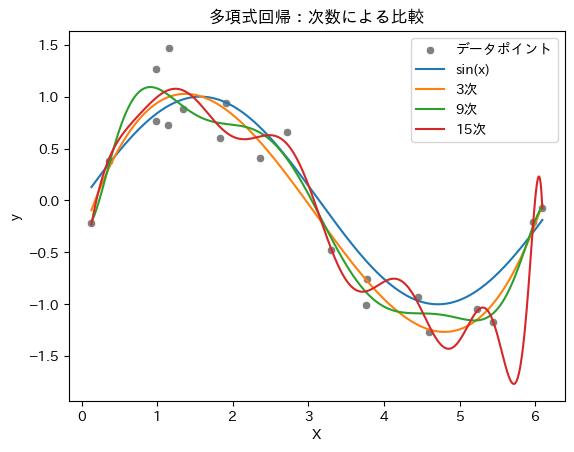

In [5]:
from sklearn.model_selection import train_test_split
degrees = [3, 9, 15]

sns.scatterplot(x=X.flatten(), y=y.flatten(), color='gray', label='データポイント')
sns.lineplot(x=X_disp.flatten(), y=y_disp.flatten(), label='sin(x)')

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    
    sns.lineplot(x=X_disp.flatten(), y=model.predict(poly_features.fit_transform(X_disp)).flatten(), label=f'{degree}次')
    
    print(f"{degree}次")
    print(f"MSE: {mean_squared_error(y, y_pred):.4f}")
    print(f"R2: {r2_score(y, y_pred):.4f}")
    print()

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('多項式回帰：次数による比較')
plt.show()

MSEと$R^2$を見ると、次数が上がるにつれてモデルの精度は向上しています。
しかし、結果の図を見ると次数が上がるにつれて$sin$関数とのずれが大きくなっています。
これは{index}`過学習<かがくしゅう - 過学習>`（オーバーフィッティング）と呼ばれる現象です。

過学習とは、機械学習モデルが訓練データに対して過度に適合してしまい、
新しいデータに対する汎化性能が低下する現象です。
つまり、モデルが訓練データの特徴や偶然のノイズまでも学習してしまい、本質的なパターンを捉えきれなくなる状態を指します。

機械学習の主な目的は、新しいデータに対しても良い予測を行えるモデルを作ることです。
しかし、過学習したモデルは訓練データにはよく合いますが、新しいデータに対してはうまく予測できません。
このため、適切なモデルの複雑さを選択し、過学習を防ぐことが重要です。

## 正則化

過学習の問題に対処する方法として{index}`正則化<せいそくか - 正則化>`があります。
正則化は、モデルの複雑さにペナルティを与え、過度に複雑なモデルを抑制する手法です。
ここでは、多項式回帰における正則化の適用について説明します。

多項式回帰における正則化の主な方法として、
{index}`Ridge回帰<Ridge回帰>`（L2正則化）と
{index}`Lasso回帰<Lasso回帰>`（L1正則化）があります。
これらの手法は、モデルのパラメータ（多項式なら係数）に対してペナルティを与え、パラメータが大きくならないようにします。

- Ridge回帰 (L2正則化)
  - パラメータの2乗和をペナルティとして与えます。これにより、すべてのパラメータが小さくなる傾向があります。

  ```{math}
  \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^m w_j^2
  ```

- Lasso回帰 (L1正則化)
  - パラメータの絶対値の和をペナルティとして与えます。これにより、一部の係数を完全にゼロにする効果があり、特徴選択の役割を果たします。
  ```{math}
  \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^m |w_j|
  ```

ここで、
$y_i$は実際の値
$\hat{y}_i$はモデルによる予測値
$n$はデータ点の数
$w_j$はモデルのパラメータ（係数）
$m$はパラメータの数
$\alpha$は正則化の強さを調整するハイパーパラメータ
です。

ハイパーパラメータは、機械学習モデルの学習プロセスを制御するための設定値です。
モデルのパラメータとは異なり、学習する前に設定する値です。

それでは、Ridge回帰を使用して、多項式回帰モデルの正則化をしてみましょう。

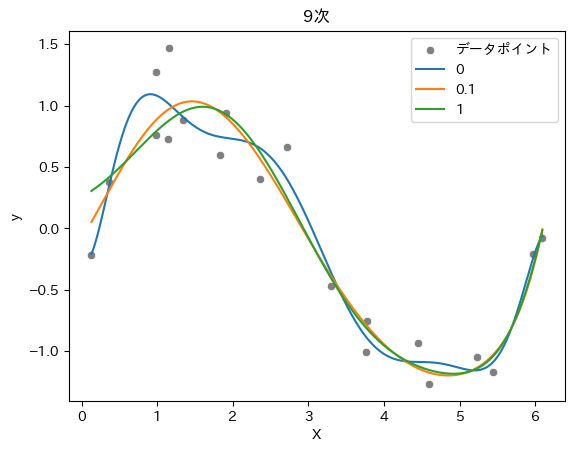

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

degree = 9
alphas = [0, 0.1, 1]

sns.scatterplot(x=X.flatten(), y=y.flatten(), color='gray', label='データポイント')    
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
    
for alpha in alphas:
    model = Ridge(alpha=alpha, solver='svd')
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    
    sns.lineplot(x=X_disp.flatten(), y=model.predict(poly_features.fit_transform(X_disp)).flatten(), label=f'{alpha}')
    
plt.title(f'{degree}次')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

このコードでは、次数9と正則化の強さ（alpha=0、0.1、1）の組み合わせでRidge回帰を適用しています。
結果を見ると、以下のことが分かります。

- 正則化なし（$alpha = 0$）の場合、過学習が起こっている。
- 正則化を適用すると（$alpha > 0$）、過学習が抑制され、より滑らかな曲線が得られます。
- alphaの値が大きいほど、モデルはより単純になり、直線に近づきます。